In [1]:
import pandas as pd
import numpy as np

# Load the dataset

In [2]:
df = pd.read_csv("../Data/features_30_sec.csv")
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


# Splitting the Dataset

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = df.loc[:, 'chroma_stft_mean':'mfcc20_var']

y = df['label']

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Model training

In [7]:
from tensorflow import keras

from keras import models
from keras import layers

In [8]:
prototype_model = keras.models.Sequential([
    keras.layers.Dense(512, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dense(10, activation="softmax"),
])

## Compilation

In [9]:
prototype_model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

## Model fitting

In [10]:
history = prototype_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=128)

Epoch 1/100
6/6 [==============================] - 1s 100ms/step - loss: 94881.0391 - accuracy: 0.1075 - val_loss: 35960.4453 - val_accuracy: 0.1061
Epoch 2/100
6/6 [==============================] - 0s 18ms/step - loss: 46728.0039 - accuracy: 0.1164 - val_loss: 36581.6406 - val_accuracy: 0.1030
Epoch 3/100
6/6 [==============================] - 0s 21ms/step - loss: 32263.0723 - accuracy: 0.1015 - val_loss: 38171.2773 - val_accuracy: 0.0939
Epoch 4/100
6/6 [==============================] - 0s 16ms/step - loss: 23247.3477 - accuracy: 0.1254 - val_loss: 21471.8828 - val_accuracy: 0.1667
Epoch 5/100
6/6 [==============================] - 0s 16ms/step - loss: 17234.0098 - accuracy: 0.1657 - val_loss: 13703.0908 - val_accuracy: 0.1636
Epoch 6/100
6/6 [==============================] - 0s 13ms/step - loss: 14523.6270 - accuracy: 0.1522 - val_loss: 11155.8857 - val_accuracy: 0.1515
Epoch 7/100
6/6 [==============================] - 0s 15ms/step - loss: 9815.2305 - accuracy: 0.1522 - val_loss

6/6 [==============================] - 0s 11ms/step - loss: 7719.4053 - accuracy: 0.2433 - val_loss: 10870.3857 - val_accuracy: 0.2758
Epoch 57/100
6/6 [==============================] - 0s 10ms/step - loss: 6412.9307 - accuracy: 0.2612 - val_loss: 7434.4849 - val_accuracy: 0.1970
Epoch 58/100
6/6 [==============================] - 0s 12ms/step - loss: 7304.6074 - accuracy: 0.2328 - val_loss: 13083.9209 - val_accuracy: 0.2000
Epoch 59/100
6/6 [==============================] - 0s 11ms/step - loss: 8653.4512 - accuracy: 0.2537 - val_loss: 10008.5811 - val_accuracy: 0.3303
Epoch 60/100
6/6 [==============================] - 0s 11ms/step - loss: 6468.6143 - accuracy: 0.3284 - val_loss: 9418.7725 - val_accuracy: 0.2606
Epoch 61/100
6/6 [==============================] - 0s 10ms/step - loss: 6432.1514 - accuracy: 0.2552 - val_loss: 5116.5840 - val_accuracy: 0.2333
Epoch 62/100
6/6 [==============================] - 0s 11ms/step - loss: 6252.5679 - accuracy: 0.3060 - val_loss: 10572.7441 - v

# Model validation

In [11]:
import matplotlib.pyplot as plt

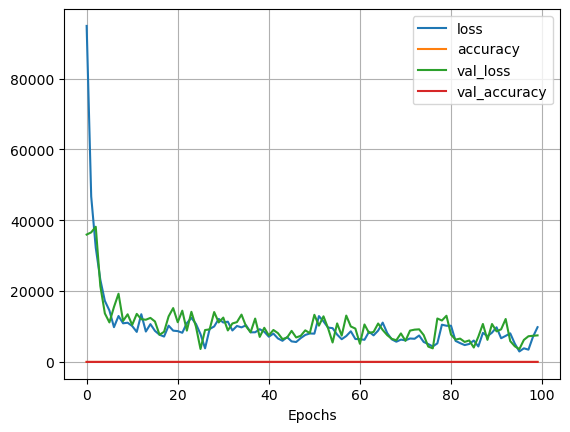

In [12]:
pd.DataFrame(history.history).plot()
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

In [13]:
prototype_model.evaluate(X_test, y_test)

11/11 [==============================] - 0s 1ms/step - loss: 7495.0986 - accuracy: 0.3000


[7495.0986328125, 0.30000001192092896]